## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
import preprocess_kgptalkie as ps
import gensim

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

## READ DATASETS

In [3]:
fake = pd.read_csv('Fake (Dataset Collection 2).csv')

In [4]:
true = pd.read_csv('True (Dataset Collection 2).csv')

In [5]:
fake.head()

,Title,Author,Text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
2,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
3,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
4,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...


In [6]:
fake.columns

Index(['Title', 'Author', 'Text'], dtype='object')

In [7]:
fake.shape

(10369, 3)

In [8]:
fake.sample(10)

,Title,Author,Text
8492,"86,000 People Kinda Used To Boiling Water At T...",Gerry McBride,"0 Add Comment \n“IT’S just part of the day,” c..."
75,James Mattis Is a Secretary of Offense,David Swanson,"Lt. Gen. James Mattis, the commander of U.S. M..."
2249,NaN,Rhonda Gilmore,I love it when libtards get their a** handed t...
6503,Bill Weld is Hillary Clinton’s Libertarian Par...,Adam Dick,Written by Adam Dick It is common in preside...
9258,Young Turks Finds Out Why Trump Is About To Lo...,Wes Williams,"By Wes Williams Election 2016 , Politics , Vid..."
10192,NaN,ctwatcher✓ᵛᵉʳᶦᶠᶦᵉᵈ,While in the NV dessert 2 fake nuclear bombs w...
8583,Busted! Wikileaks Proves Obama Lied about when...,Tim Brown,"Well, in a long list of documented lies, cover..."
9920,The De Facto US/Al Qaeda Alliance,NaN,License DMCA \nA curious aspect of the Syrian ...
6595,Paul Craig Roberts: “We All Might Be Dead Soon…”,Starkman,Economist and American civil servant Dr. Paul ...
5780,PETITION TO STOP GEORGE SOROS VOTING MACHINES ...,Eddy Lavine,posted by Eddie \nA White House petition to re...


In [9]:
true.head()

,Title,Author,Text
0,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
1,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
2,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
3,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...
4,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...


In [10]:
true.columns

Index(['Title', 'Author', 'Text'], dtype='object')

In [11]:
true.shape

(10349, 3)

In [12]:
true.sample(10)

,Title,Author,Text
8061,Border Patrol Agents Arrest Smuggler After Rol...,Bob Price,Border Patrol agents from the Yuma and El Cent...
9939,"Trump, Tillerson, Venezuela: Your Thursday Eve...",Karen Zraick and Sandra Stevenson,(Want to get this briefing by email? Here’s th...
3254,"Global Warming Alters Arctic Food Chain, Scien...",Carl Zimmer,The Arctic Ocean may seem remote and forbiddin...
5168,Surprise! Insurance Paid the E.R. but Not the ...,Margot Sanger-Katz and Reed Abelson,Doug Moore was out of town at a Florida confer...
3957,Pence: World Will Know America Stands with Israel,Breitbart Jerusalem,CBS News reports: LAS VEGAS — Vice Presiden...
7728,"Begging on Liberia’s Streets by Day, Heating U...",Clair MacDougall,"MONROVIA, Liberia — Emmanuel Dongo, who spe..."
9066,Where Did the Government Jobs Go? - The New Yo...,Annie Lowrey,"On a muggy afternoon in April, Angelina Iles, ..."
1467,Kellogg’s Brand Falls from 60 to 84th Place wi...,Warner Todd Huston,"Continuing its business slump, a new review of..."
10140,"ESPN’s Historic Setback: Celebrate It, but Not...",Dylan Gwinn,The era of big cable sports is over. [It ended...
4147,"Theresa May, Donald Trump, Hillary Clinton: Yo...",Andrea Kannapell and Sandra Stevenson,(Want to get this briefing by email? Here’s th...


## Data Preprocessing

Drop news stories that have 'NaN' values

In [13]:
fake = fake.drop(63, axis = 0)
fake = fake.drop(278, axis = 0)
fake = fake.drop(598, axis = 0)
fake = fake.drop(967, axis = 0)
fake = fake.drop(1085, axis = 0)
fake = fake.drop(1097, axis = 0)
fake = fake.drop(1412, axis = 0)
fake = fake.drop(1676, axis = 0)
fake = fake.drop(1882, axis = 0)
fake = fake.drop(2172, axis = 0)
fake = fake.drop(2212, axis = 0)
fake = fake.drop(2857, axis = 0)
fake = fake.drop(3087, axis = 0)
fake = fake.drop(3340, axis = 0)
fake = fake.drop(4286, axis = 0)
fake = fake.drop(4422, axis = 0)
fake = fake.drop(4431, axis = 0)
fake = fake.drop(4642, axis = 0)
fake = fake.drop(4690, axis = 0)
fake = fake.drop(4694, axis = 0)
fake = fake.drop(4731, axis = 0)
fake = fake.drop(5215, axis = 0)
fake = fake.drop(5424, axis = 0)
fake = fake.drop(5716, axis = 0)
fake = fake.drop(5734, axis = 0)
fake = fake.drop(6014, axis = 0)
fake = fake.drop(6211, axis = 0)
fake = fake.drop(6391, axis = 0)
fake = fake.drop(6481, axis = 0)
fake = fake.drop(6522, axis = 0)
fake = fake.drop(6930, axis = 0)
fake = fake.drop(7219, axis = 0)
fake = fake.drop(7429, axis = 0)
fake = fake.drop(8028, axis = 0)
fake = fake.drop(9183, axis = 0)
fake = fake.drop(9316, axis = 0)
fake = fake.drop(9514, axis = 0)
fake = fake.drop(9549, axis = 0)
fake = fake.drop(9645, axis = 0)

Find news stories with no text

In [14]:
text = ' '.join(fake['Text'].tolist())

In [15]:
empty_fake_index = [index for index, text in enumerate(fake.Text.tolist()) if str(text).strip()==""]

In [16]:
fake.iloc[empty_fake_index]

,Title,Author,Text
37,Huma’s Weiner Dogs Hillary,Steve Sailer,
77,Mohamad Khweis: Another “Virginia Man” (Palest...,James Fulford,
140,A Connecticut Reader Reports Record Voter Regi...,VDARE.com Reader,
217,BULLETIN: There ARE Righteous Jews For Trump!;...,admin,
291,Is your promising internet career over now Vin...,newsbiscuit editorial team,
...,...,...,...
9932,98% of public now ‘really looking forward’ to ...,NewsBiscuit,
10038,Thomas Frank Explores Whether Hillary Clinton ...,NaN,
10092,Radio Derb Transcript For October 21 Up: The M...,John Derbyshire,
10102,Pro-sovereignty Legislators Demand That Admini...,Brenda Walker,


Combine title and text into one column

In [17]:
true['Text'] = true['Title'] + " " + true['Text']

In [18]:
fake['Text'] = fake['Title'] + " " + fake['Text']

Set all text as lower case

In [19]:
true['Text'] = true['Text'].apply(lambda x: str(x).lower())

In [20]:
fake['Text'] = fake['Text'].apply(lambda x: str(x).lower())

set 'True' classifier as 0 and 'Fake' classifier as 1

In [21]:
true['class'] = 0
fake['class'] = 1

In [22]:
true.columns

Index(['Title', 'Author', 'Text', 'class'], dtype='object')

In [23]:
fake.columns

Index(['Title', 'Author', 'Text', 'class'], dtype='object')

Remove all columns except text and class

In [24]:
true = true[['Text', 'class']]

In [25]:
fake = fake[['Text', 'class']]

In [26]:
true.shape

(10349, 2)

In [27]:
fake.shape

(10330, 2)

combine fake and true datasets into one dataset

In [28]:
data = true.append(fake, ignore_index = True)

In [29]:
data.sample(5)

,Text,class
11005,"merkel says facebook, google 'distort percepti...",1
8607,what donald trump got wrong on stop-and-frisk ...,0
2462,idaho town is rattled months after reports of ...,0
20126,nan,1
513,"after blast, new yorkers examine themselves fo...",0


remove special characters from text

In [30]:
data['Text'] = data['Text'].apply(lambda x: ps.remove_special_chars(x))

In [31]:
data.head()

,Text,class
0,flynn hillary clinton big woman on campus brei...,0
1,jackie mason hollywood would love trump if he ...,0
2,benoît hamon wins french socialist partys pres...,0
3,excerpts from a draft script for donald trumps...,0
4,a backchannel plan for ukraine and russia cour...,0


Separate the dataset where z holds all text that will be converted into vectors and y holds the truth values of every news story

In [32]:
z = [d.split() for d in data['Text'].tolist()]

In [33]:
y = data['class'].values

In [34]:
type(z)

list

In [35]:
print(z[0])

['flynn', 'hillary', 'clinton', 'big', 'woman', 'on', 'campus', 'breitbart', 'ever', 'get', 'the', 'feeling', 'your', 'life', 'circles', 'the', 'roundabout', 'rather', 'than', 'heads', 'in', 'a', 'straight', 'line', 'toward', 'the', 'intended', 'destination', 'hillary', 'clinton', 'remains', 'the', 'big', 'woman', 'on', 'campus', 'in', 'leafy', 'liberal', 'wellesley', 'massachusetts', 'everywhere', 'else', 'votes', 'her', 'most', 'likely', 'to', 'don', 'her', 'inauguration', 'dress', 'for', 'the', 'remainder', 'of', 'her', 'days', 'the', 'way', 'miss', 'havisham', 'forever', 'wore', 'that', 'wedding', 'dress', 'speaking', 'of', 'great', 'expectations', 'hillary', 'rodham', 'overflowed', 'with', 'them', '48', 'years', 'ago', 'when', 'she', 'first', 'addressed', 'a', 'wellesley', 'graduating', 'class', 'the', 'president', 'of', 'the', 'college', 'informed', 'those', 'gathered', 'in', '1969', 'that', 'the', 'students', 'needed', 'no', 'debate', 'so', 'far', 'as', 'i', 'could', 'ascertain'

## Word2Vec Model

Define word2vec model with the input being the list of text of news stories, the vector size, window which determines how many words are taken in a batch and a min count of 1 to ensure that a vector is generated for every word

In [36]:
dim = 50
w2v = gensim.models.Word2Vec(sentences=z, vector_size=dim, window=10, min_count=1)

Determine how many vectors were created

In [37]:
len(w2v.wv.index_to_key)

218048

In [38]:
w2v.wv.get_index('china')

307

In [39]:
w2v.wv['china']

array([  0.33550447,   0.6616602 ,  -0.8525096 ,  -1.0247927 ,
         0.5304433 ,  -3.8714738 ,  -2.0178924 ,   3.8229773 ,
         0.87240666,   1.5356863 ,   0.88323957,  -0.14158408,
         4.5776553 ,  -5.8895364 ,   2.6933231 ,  -3.3560169 ,
         0.23510821,  -2.9897525 ,   2.9135687 ,  -1.7613362 ,
        -0.17852773,  -0.38584533,  -3.453166  ,  -2.1006052 ,
         0.9831856 ,   2.0191305 ,   4.112972  ,  -1.7233894 ,
         0.6820285 ,  -3.1952596 ,  -1.7579335 ,   6.4575706 ,
        -0.8075595 , -10.0965185 ,   4.0238557 ,   0.43844455,
         2.662137  ,   2.1222699 ,  -6.255642  ,   0.7445745 ,
         3.4056492 ,  -1.6420257 ,   1.5256184 ,   0.09483504,
         2.7087655 ,  -2.4537265 ,  -0.98635185,   2.4754353 ,
         0.70932937,  -0.29705134], dtype=float32)

In [40]:
w2v.wv.most_similar('china')

[('beijing', 0.8858924508094788),
 ('taiwan', 0.8442622423171997),
 ('japan', 0.8215535879135132),
 ('chinas', 0.8026145696640015),
 ('pyongyang', 0.7981662154197693),
 ('india', 0.7819934487342834),
 ('asia', 0.7584371566772461),
 ('chinese', 0.7518907189369202),
 ('gazprom', 0.7409873604774475),
 ('organizationsco', 0.7324265837669373)]

Define tokenizer and feed text into it

In [41]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(z)

Convert text into sequences

In [42]:
z = tokenizer.texts_to_sequences(z)

Determine the total number of words in a news story

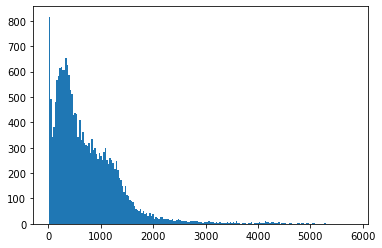

In [43]:
plt.hist([len(x) for x in z], bins = 200)
plt.show()

Find number of news stories that are more than 1000 words

In [44]:
nos = np.array([len(x) for x in z])
len(nos[nos > 1000])

5572

Ensure that all news stories have 1000 words. Pad if less than 1000, truncate if more than 1000

In [45]:
maxlen = 1000
z = pad_sequences(z, maxlen = maxlen)

In [46]:
len(z[101])

1000

Add 1 to the vocabulary so that if the model finds an unkwown word, it creates a new sequence for those unknown words

In [47]:
vocab_size = len(tokenizer.word_index) + 1

In [48]:
vocab = tokenizer.word_index

Obtain initial weight of vectors for use in LSTM model

In [49]:
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size, dim))
    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]
    return weight_matrix

In [50]:
embedding_vectors = get_weight_matrix(w2v)

In [51]:
embedding_vectors.shape

(218049, 50)

## LSTM Model

Define model

In [52]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim = dim, weights = [embedding_vectors], input_length = maxlen, trainable = True))
model.add(LSTM(units = 128))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 50)          10902450  
                                                                 
 lstm (LSTM)                 (None, 128)               91648     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 10,994,227
Trainable params: 10,994,227
Non-trainable params: 0
_________________________________________________________________


Create train:test split of 75:25

In [54]:
z_train, z_test, y_train, y_test = train_test_split(z,y)

Train model

In [55]:
system = model.fit(z_train,y_train, validation_split=0.3, epochs=9)

Epoch 1/9
340/340 [==============================] - 398s 1s/step - loss: 0.3837 - acc: 0.8206 - val_loss: 0.2548 - val_acc: 0.8947
Epoch 2/9
340/340 [==============================] - 390s 1s/step - loss: 0.2026 - acc: 0.9209 - val_loss: 0.1920 - val_acc: 0.9218
Epoch 3/9
340/340 [==============================] - 398s 1s/step - loss: 0.1167 - acc: 0.9562 - val_loss: 0.1568 - val_acc: 0.9385
Epoch 4/9
340/340 [==============================] - 400s 1s/step - loss: 0.0711 - acc: 0.9760 - val_loss: 0.0851 - val_acc: 0.9708
Epoch 5/9
340/340 [==============================] - 421s 1s/step - loss: 0.0424 - acc: 0.9850 - val_loss: 0.0811 - val_acc: 0.9716
Epoch 6/9
340/340 [==============================] - 414s 1s/step - loss: 0.0234 - acc: 0.9928 - val_loss: 0.0884 - val_acc: 0.9718
Epoch 7/9
340/340 [==============================] - 415s 1s/step - loss: 0.0220 - acc: 0.9932 - val_loss: 0.0827 - val_acc: 0.9768
Epoch 8/9
340/340 [==============================] - 425s 1s/step - loss: 0.

In [56]:
print(system.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


Plot training and validation accuracy and loss

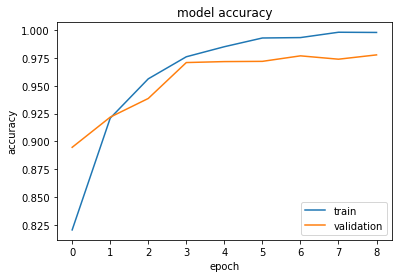

In [57]:
plt.plot(system.history['acc'])
plt.plot(system.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

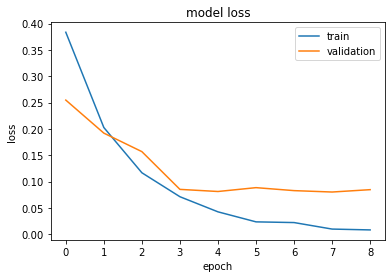

In [58]:
plt.plot(system.history['loss'])
plt.plot(system.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Test model with test split

In [59]:
y_pred = (model.predict(z_test) >= 0.5).astype(int)

In [60]:
accuracy_score(y_test, y_pred)

0.9748549323017408

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2571
           1       0.97      0.98      0.98      2599

    accuracy                           0.97      5170
   macro avg       0.97      0.97      0.97      5170
weighted avg       0.97      0.97      0.97      5170



Test model with Test Dataset

In [62]:
test = pd.read_csv('test.csv')

In [63]:
values = pd.read_csv('Truth Values.csv')

In [64]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [65]:
values.head()

,id,label
0,20800,0
1,20801,1
2,20802,1
3,20803,0
4,20804,1


In [66]:
test['text'] = test['text'].apply(lambda x: str(x).lower())

In [67]:
test['text'] = test['text'].apply(lambda x: ps.remove_special_chars(x))

In [68]:
test['text'].head()

0    palo alto calif after years of scorning the po...
1    russian warships ready to strike terrorists ne...
2    videos nodapl native american leaders vow to s...
3    if at first you dont succeed try a different s...
4    42 mins ago 1 views 0 comments 0 likes for the...
Name: text, dtype: object

In [69]:
x = test['text']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen = maxlen)
results = (model.predict(x) >= 0.5).astype(int)

In [70]:
test_values = values['label'].values

In [71]:
accuracy_score(test_values, results)

0.9401923076923077

In [72]:
print(classification_report(test_values, results))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      2656
           1       0.91      0.97      0.94      2544

    accuracy                           0.94      5200
   macro avg       0.94      0.94      0.94      5200
weighted avg       0.94      0.94      0.94      5200



In [73]:
final_results = pd.DataFrame()
final_results['id'] = test['id']
final_results['label'] = results
final_results.to_csv('Results (Dataset Collection 2).csv', index = False)